In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tools.plotting import scatter_matrix
%matplotlib inline 

In [3]:
df_train=pd.read_csv("train.csv")
df_train.info()
#df_train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


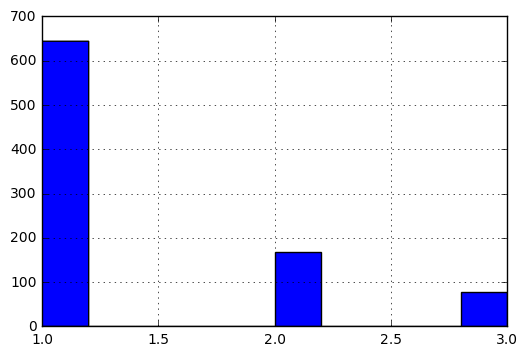

In [26]:
df_train['Embarked'].hist()

In [4]:
df_test=pd.read_csv("test.csv")
df_test.info()
#df_test.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [5]:
df_train['Embarked']=df_train['Embarked'].map({'S':1, 'C':2,'Q':3})

In [6]:
df_test['Embarked']=df_test['Embarked'].map({'S':1, 'C':2,'Q':3})

In [7]:
df_train['Sex']= df_train['Sex'].map({'female': 1, 'male': 0})

In [8]:
df_test['Sex']= df_test['Sex'].map({'female': 1, 'male': 0})

In [27]:
# fill out missing Age with median value in df_train
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].median())
# fill out missing Embarked with S(i.e. 1)
df_train['Embarked'] = df_train['Embarked'].fillna(1)


In [18]:
# fill out missing fare and Age with median value in df_test
df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].median())
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].median())

In [19]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,3
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,1
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,3
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,1


In [12]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,2.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,1.0


In [28]:
# drop names, ticket, Cabin
df_train_check=df_train.iloc[:,(0,1,2,4,5,6,7,9,11)]
df_test_check=df_test.iloc[:,(0,1,3,4,5,6,8,10)]

In [21]:
df_train_check.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,1.0
1,2,1,1,1,38.0,1,0,71.2833,2.0
2,3,1,3,1,26.0,0,0,7.9250,1.0
3,4,1,1,1,35.0,1,0,53.1000,1.0
4,5,0,3,0,35.0,0,0,8.0500,1.0


In [22]:
df_test_check.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,34.5,0,0,7.8292,3
1,893,3,1,47.0,1,0,7.0000,1
2,894,2,0,62.0,0,0,9.6875,3
3,895,3,0,27.0,0,0,8.6625,1
4,896,3,1,22.0,1,1,12.2875,1


In [29]:
df_train_check.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [24]:
df_test_check.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

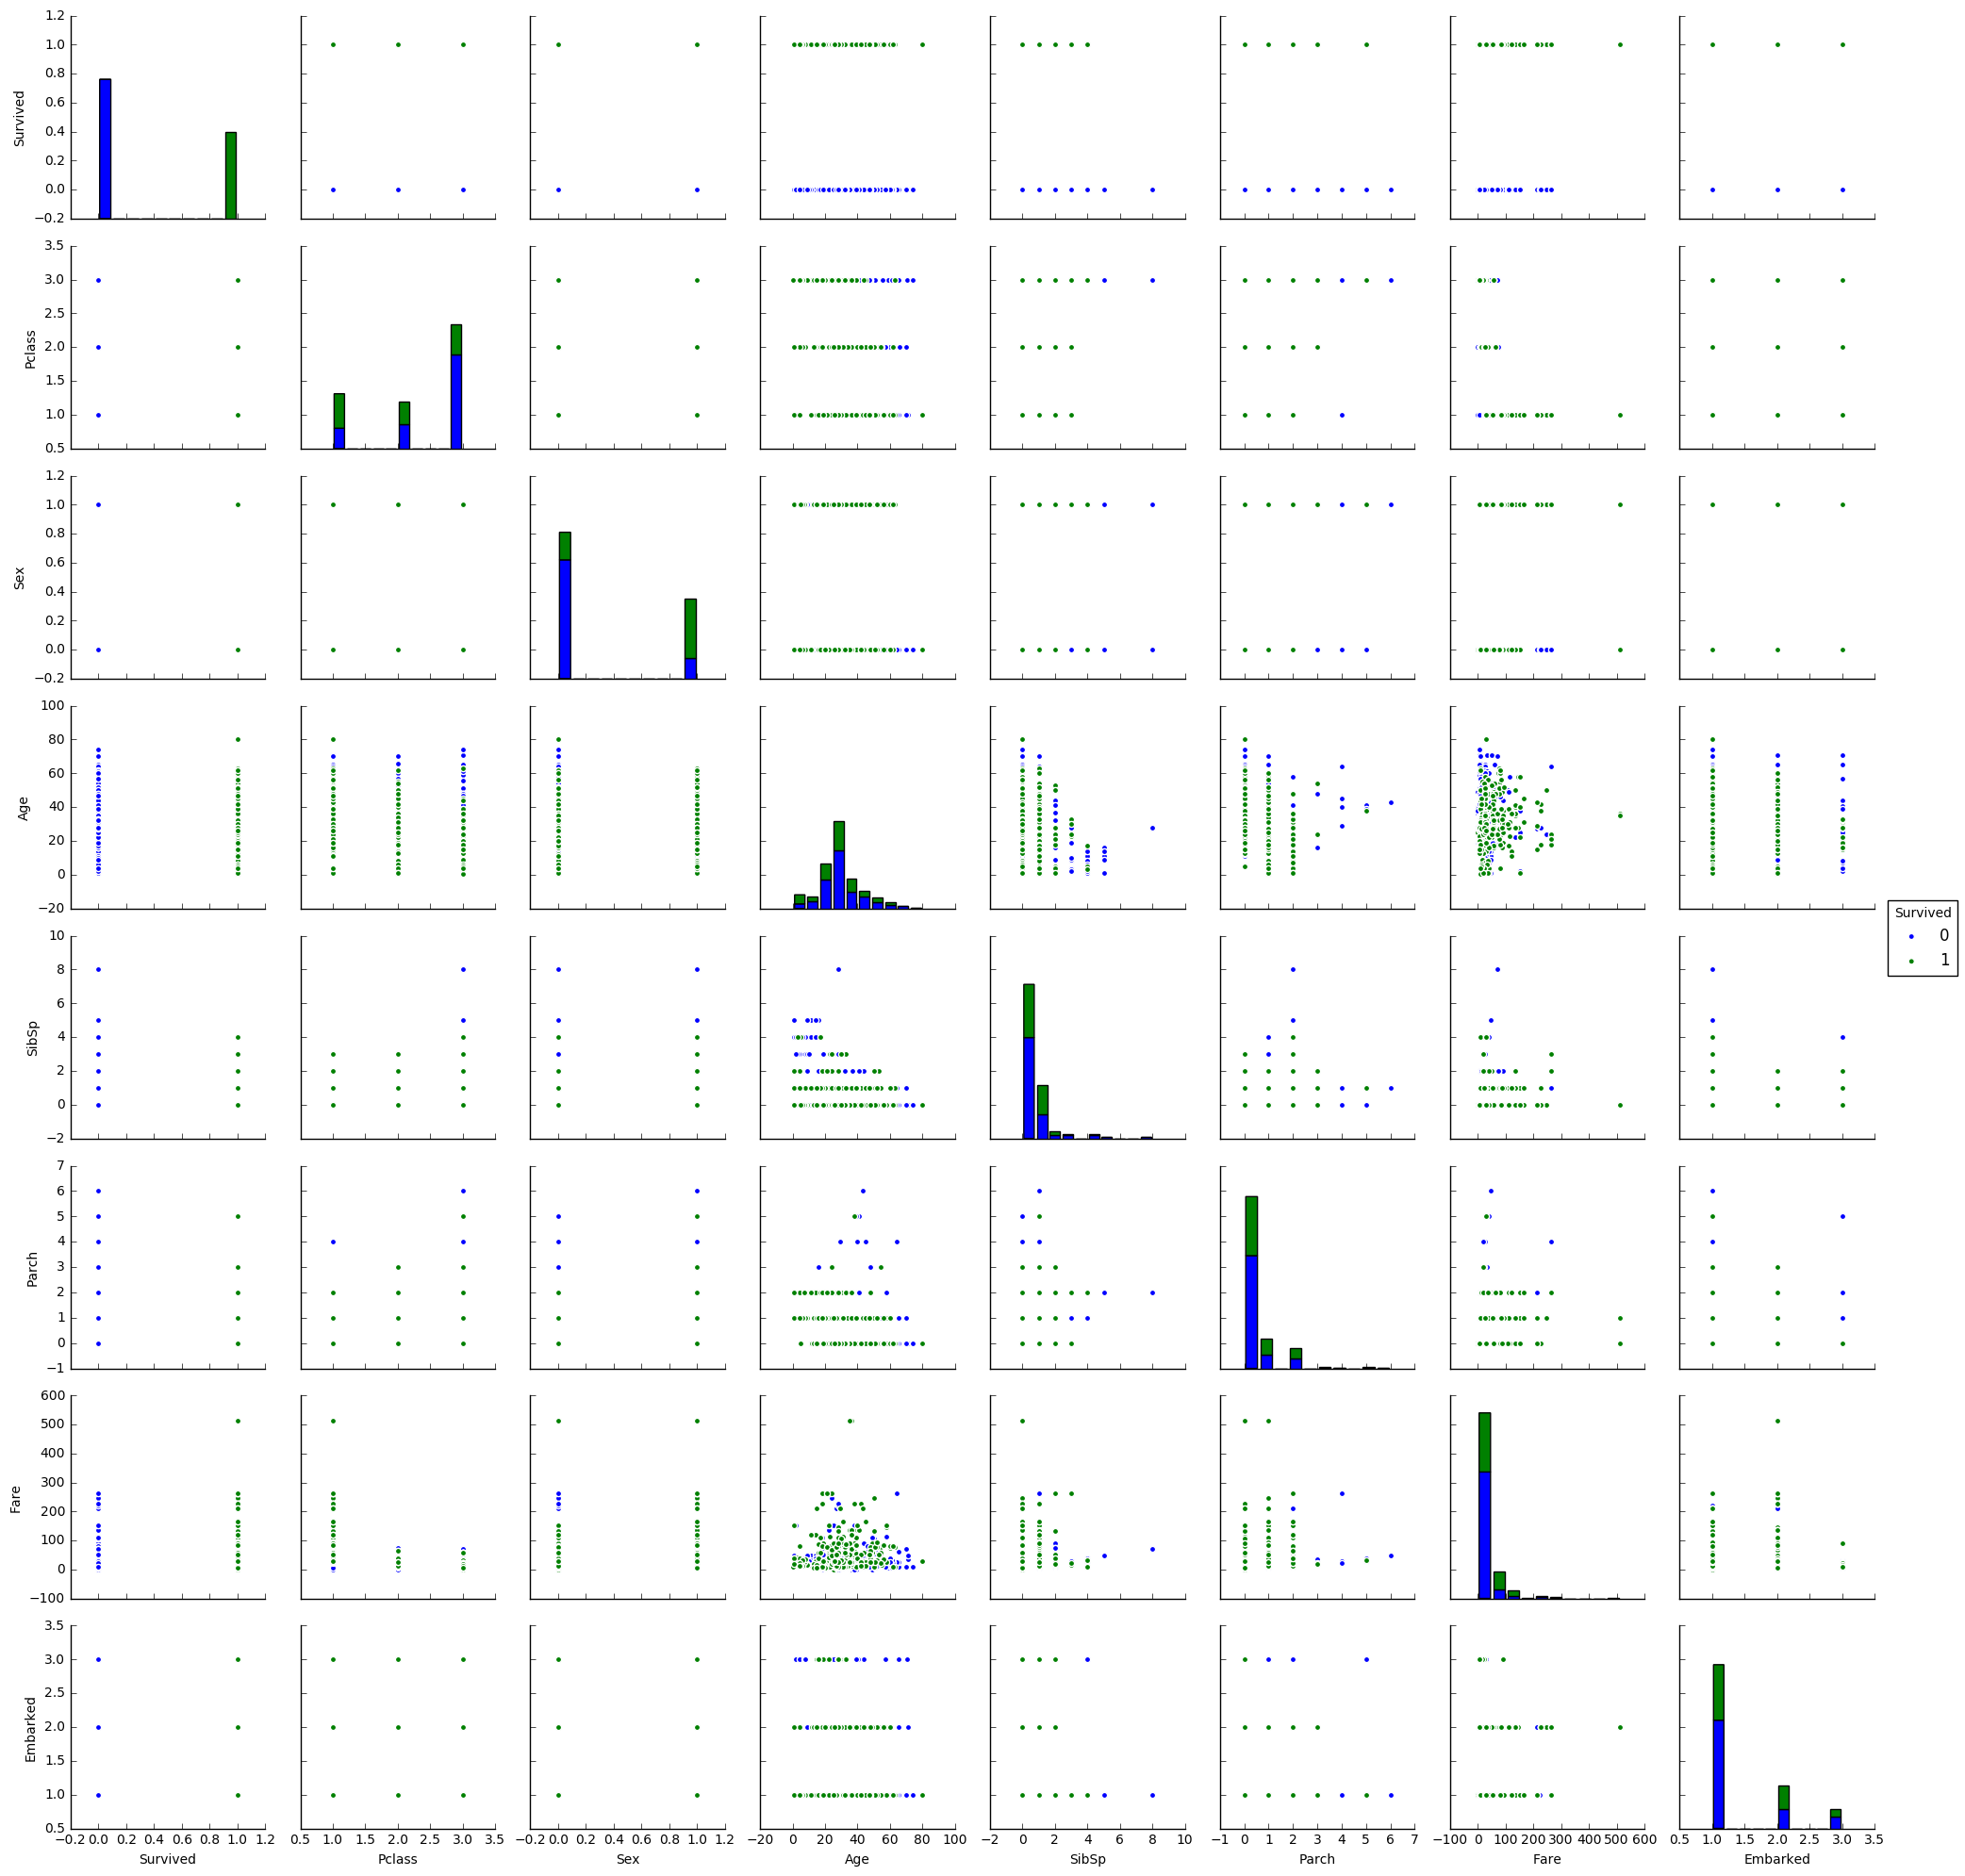

In [30]:
g=sns.pairplot(df_train_check.iloc[:,1:9], hue='Survived')

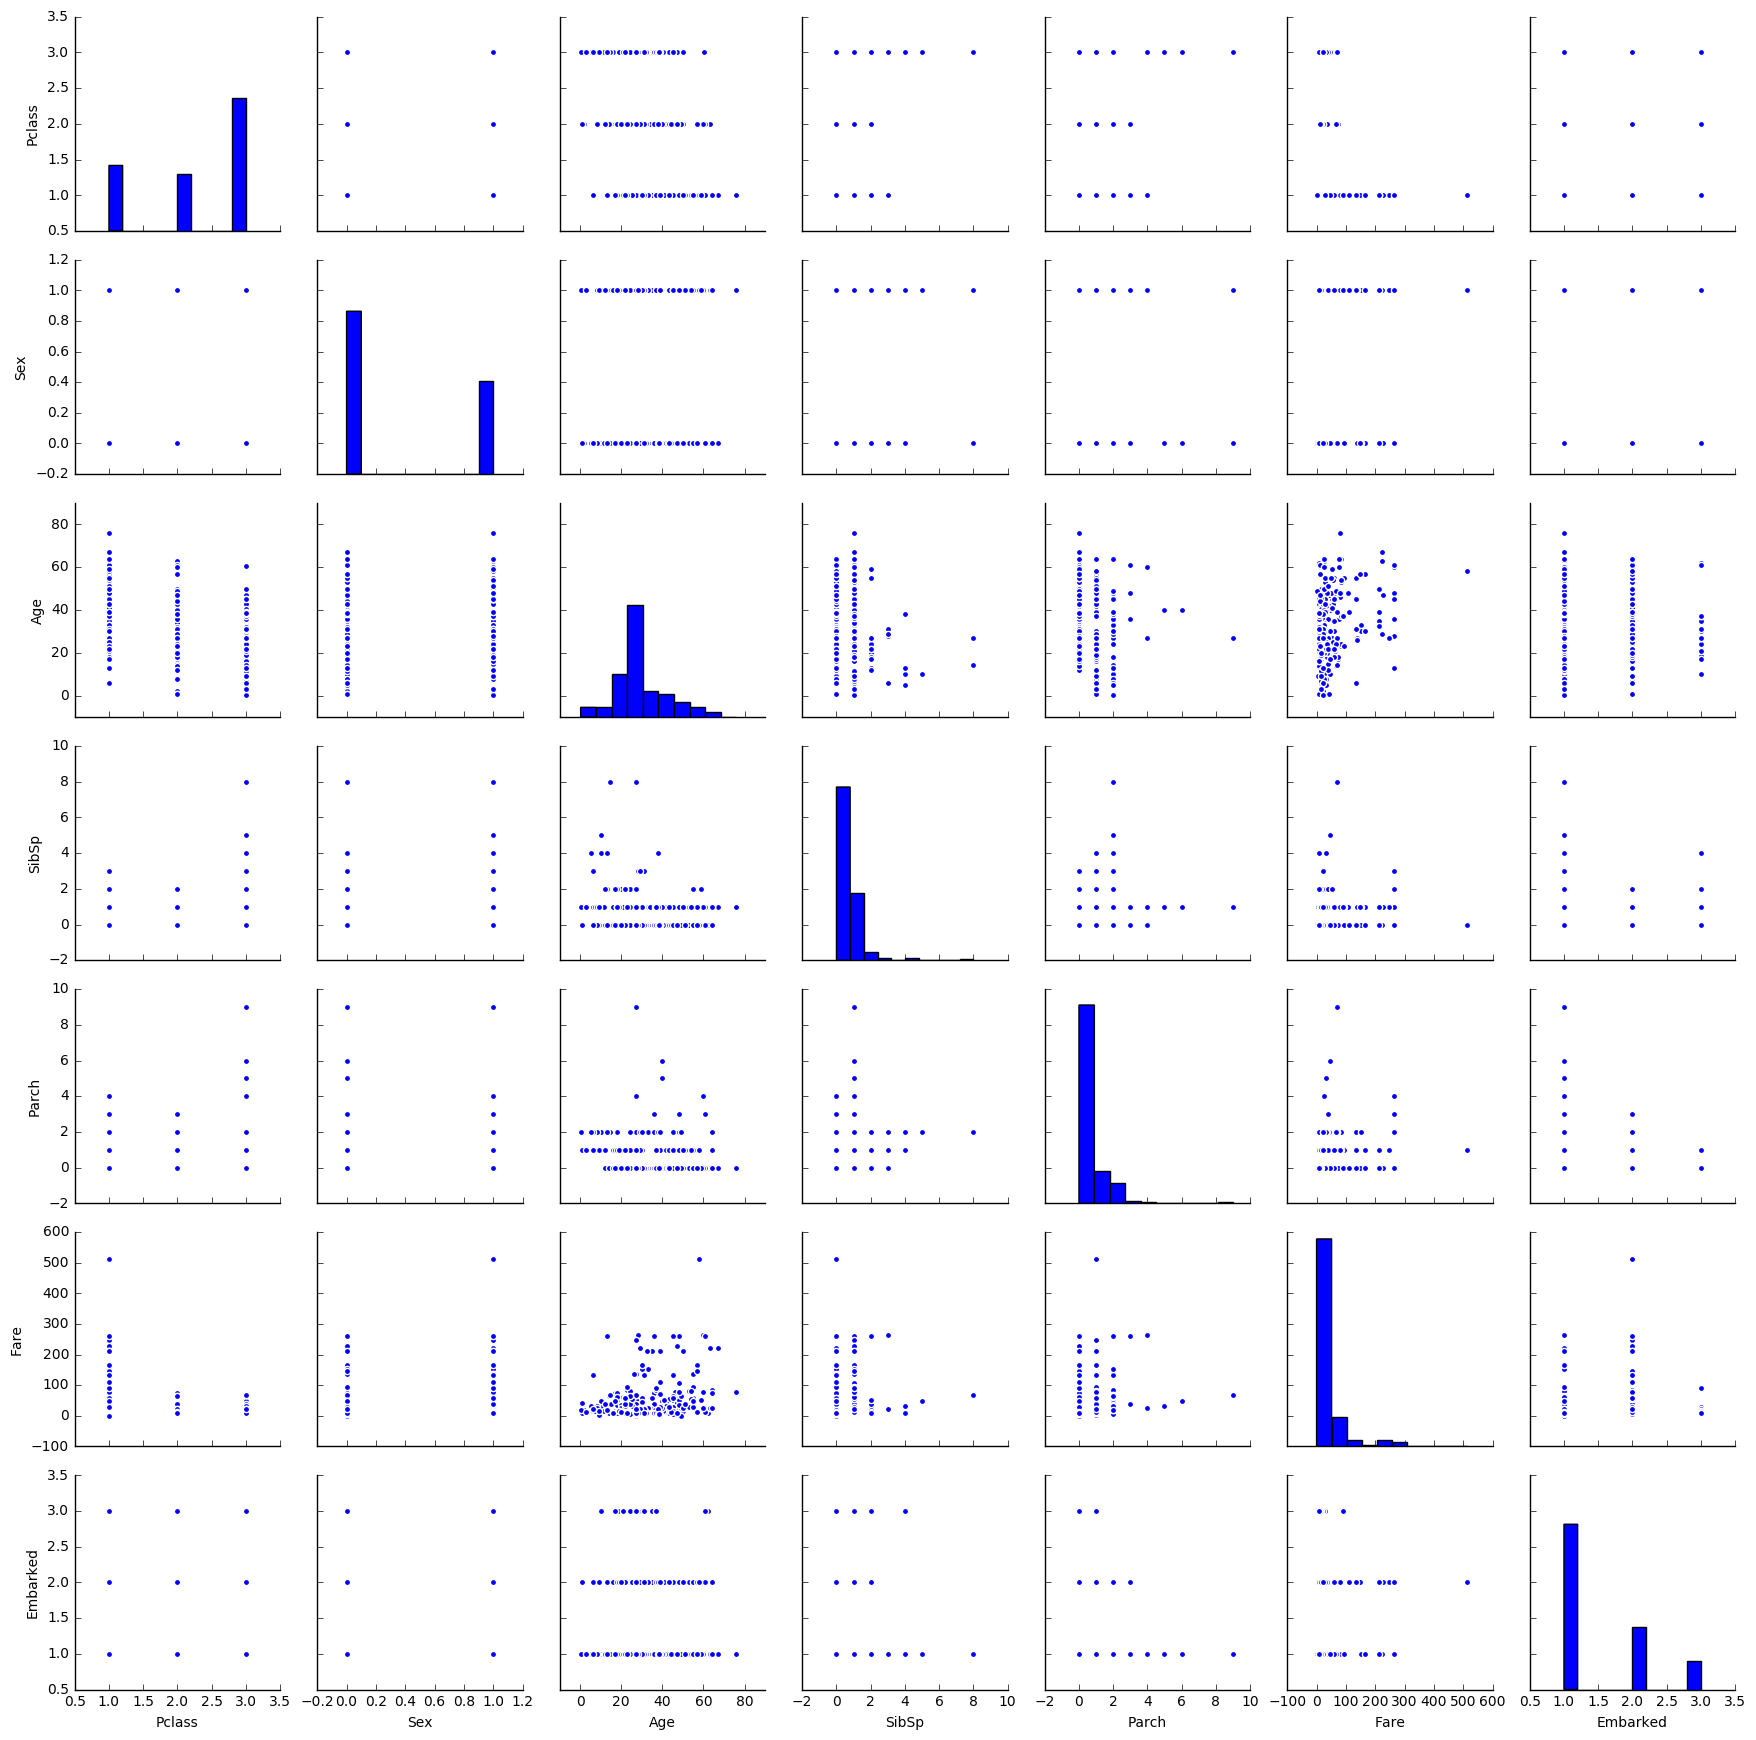

In [32]:
g=sns.pairplot(df_test_check.iloc[:,1:8])

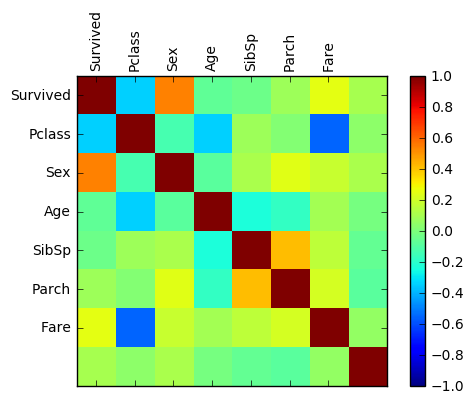

In [38]:
correlations = df_train_check.iloc[:,1:9].corr()
names=['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,7,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.xticks(rotation=90)
plt.show()

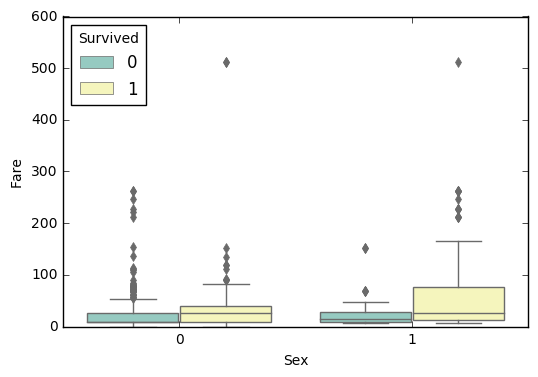

In [34]:
ax = sns.boxplot(x="Sex", y="Fare", hue="Survived",data=df_train_check, palette="Set3")

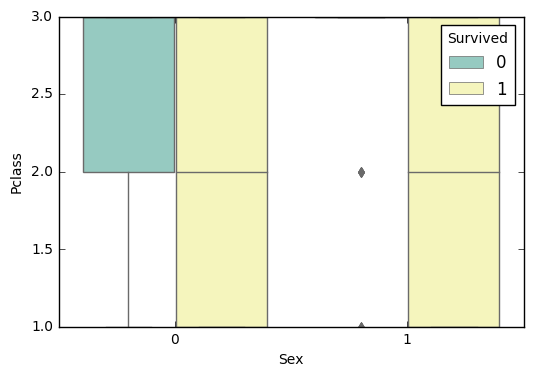

In [35]:
ax = sns.boxplot(x="Sex", y="Pclass", hue="Survived",data=df_train_check, palette="Set3")

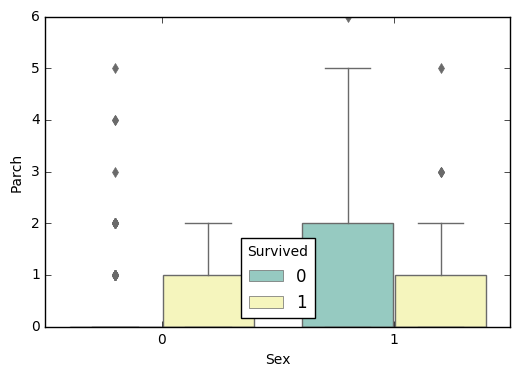

In [36]:
ax = sns.boxplot(x="Sex", y="Parch", hue="Survived",data=df_train_check, palette="Set3")

In [ ]:
sns.countplot(x='Survived',data=df_train_check)

In [37]:
# Importing modules
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cross_validation import cross_val_score
import random

C:\Users\takakonoPC\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [50]:
# pclass, sex, age, fare

X=df_train_check.iloc[:,(2,3,7)]
y=df_train_check.iloc[:,1]


random.seed(3)
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print(scores)
print(scores.mean())
print(scores.std())


[ 0.8         0.77777778  0.7752809   0.84269663  0.7752809   0.76404494
  0.76404494  0.74157303  0.82022472  0.76136364]
0.782228748156
0.0287780709637


In [41]:
model = DecisionTreeClassifier()
model = model.fit(X, y)
model.score(X, y)

0.97755331088664421

In [51]:
scores = cross_val_score(DecisionTreeClassifier(), X, y, scoring='accuracy', cv=4)
print(scores)
print(scores.mean())
print(scores.std())

[ 0.70982143  0.8161435   0.84684685  0.82432432]
0.799284024375
0.0528607524391


In [52]:
scores = cross_val_score(RandomForestClassifier(), X, y, scoring='accuracy', cv=4)
print(scores)
print(scores.mean())
print(scores.std())

[ 0.70982143  0.8161435   0.81531532  0.8018018 ]
0.785770510862
0.044217302024


In [53]:
scores = cross_val_score(KNeighborsClassifier(), X, y, scoring='accuracy', cv=4)
print(scores)
print(scores.mean())
print(scores.std())

[ 0.73214286  0.8206278   0.8018018   0.77477477]
0.782336809103
0.0332479447006


In [54]:
scores = cross_val_score(GaussianNB(), X, y, scoring='accuracy', cv=4)
print(scores)
print(scores.mean())
print(scores.std())

[ 0.76785714  0.78923767  0.76576577  0.78828829]
0.777787216268
0.0110057597678


In [55]:
scores = cross_val_score(SVC(), X, y, scoring='accuracy', cv=4)
print(scores)
print(scores.mean())
print(scores.std())

[ 0.70982143  0.80717489  0.8018018   0.78828829]
0.776771601638
0.0392614011478


In [58]:
Test=df_test_check.iloc[:,(1,2,6)]


In [59]:
model = KNeighborsClassifier()
Fitted_model= model.fit(X, y)
Prediction= Fitted_model.predict(Test)

In [60]:
Prediction

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0,

In [64]:
submission = pd.DataFrame({
    "PassengerId" : df_test_check['PassengerId'],
    "Survived" : Prediction
})

In [66]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
PassengerId    418 non-null int64
Survived       418 non-null int64
dtypes: int64(2)
memory usage: 6.6 KB
